In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Matrix_inverse import inverse
from LU import lu
from Determinant import determinant
from lab1.Binet import binet
from lab1.Strassen import strassen

In [2]:
from time import perf_counter

def timeit(func):
    def wrapper(*args, **kwargs):
        t1 = perf_counter()
        res = func(*args, **kwargs)
        t2 = perf_counter()
        return res, round(t2 - t1, 4)
    return wrapper

def random_matrix(size):
    return np.random.uniform(0.00000001, 1, (size, size))

Quick tests

In [5]:
from test_algorithms import test_determinant
from test_algorithms import test_inverse
from test_algorithms import test_lu
from Arithmetic_counter import Counter


sizes = np.array([pow(2, i) for i in range(6)])

for s in sizes:
    rand_matrix = random_matrix(s)
    test_determinant(rand_matrix)
    test_determinant(rand_matrix, strassen)
    test_inverse(rand_matrix)
    test_inverse(rand_matrix, strassen)
    test_lu(rand_matrix)
    test_lu(rand_matrix, strassen)
    print()

Test passed
Test passed
Test passed
Test passed
Test passed
Test passed

Test passed
Test passed
Test passed
Test passed
Test passed
Test passed

Test passed
Test passed
Test passed
Test passed
Test passed
Test passed

Test passed
Test passed
Test passed
Test passed
Test passed
Test passed

Test passed
Test passed
Test passed
Test passed
Test passed
Test passed

Test passed
Test passed
Test passed
Test passed
Test passed
Test passed



In [27]:
sizes = np.array([pow(2, i) for i in range(9)])

timed_det = timeit(determinant)
timed_lu = timeit(lu)
timed_inv = timeit(inverse)

In [28]:
det_results_binet = []
lu_results_binet = []
inv_results_binet = []

det_results_strassen = []
lu_results_strassen = []
inv_results_strassen = []

for s in sizes:
    print(s)
    rand_matrix = random_matrix(s)

    res, time = timed_inv(rand_matrix)
    inv_results_binet.append((time, res[-1]))
    print(time)
    res, time = timed_inv(rand_matrix, mul_func=strassen)
    inv_results_strassen.append((time, res[-1]))

    res, time = timed_lu(rand_matrix)
    lu_results_binet.append((time, res[-1]))

    res, time = timed_lu(rand_matrix, mul_func=strassen)
    lu_results_strassen.append((time, res[-1]))

    res, time = timed_det(rand_matrix)
    det_results_binet.append((time, res[-1]))

    res, time = timed_det(rand_matrix, mul_func=strassen)
    det_results_strassen.append((time, res[-1]))

1
0.0
2
0.0001
4
0.0003
8
0.003
16
0.0223
32
0.2032
64
1.2447
128
9.9929
256
80.965


In [29]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.power(x, b)

In [30]:
print(det_results_binet)

[(0.0, Counter(0, 1, 0)), (0.0, Counter(0, 5, 2)), (0.0003, Counter(17, 46, 8)), (0.0023, Counter(254, 404, 24)), (0.0175, Counter(2652, 3352, 64)), (0.2262, Counter(24088, 27152, 160)), (1.0751, Counter(205168, 218080, 384)), (8.3122, Counter(1693536, 1746752, 896)), (73.067, Counter(13762496, 13979008, 2048))]


In [45]:
def plot_axis(y, plot_title, title):
    plt.clf()
    best_params, _ = curve_fit(func, sizes, y)
    print(best_params)
    mesh = np.linspace(0, sizes[-1] + 1, 100)
    curve = func(mesh, *best_params)
    plt.plot(sizes, y, markersize=7, marker="o", linestyle="None", zorder=1, label="Pomiary")
    plt.plot(mesh, curve, marker="None", zorder=0, label=f"Dopasowana krzywa, a={best_params[0]:.2f}, b={best_params[1]:.2f}")
    plt.legend()
    plt.title(title)
    plt.savefig(f"saved_plots/{plot_title}")


def print_results(results, title):
    times, count = zip(*results)
    add, mul, div = zip(*map(Counter.get_params, count))
    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    plot_axis(np.array(times)*1000, f"{title}1", "Pomiary czasu")
    plot_axis(add, f"{title}2", "Ilość dodawań")
    plot_axis(mul, f"{title}3", "Ilość mnożeń")
    plot_axis(div, f"{title}4", "Ilość dzieleń")

    d = {"Wymiar macierzy": sizes,
         "Pomiary czasu[ms]": times,
         "Ilość dodawań": add,
         "Ilość mnożeń": mul,
         "Ilość dzieleń": div}

    df = pd.DataFrame(data=d)
    df = df.set_index("Wymiar macierzy")

    print(df.to_latex(bold_rows=True))


[0.00543283 2.93587428]
[2.3395279  2.89600017]
[0.79269618 2.9514077 ]
[2.52782382 1.20799327]
\begin{tabular}{lrrrr}
\toprule
{} &  Pomiary czasu[ms] &  Ilość dodawań &  Ilość mnożeń &  Ilość dzieleń \\
\textbf{Wymiar macierzy} &                    &                &               &                \\
\midrule
\textbf{1              } &             0.0000 &              0 &             0 &              0 \\
\textbf{2              } &             0.0000 &              0 &             3 &              2 \\
\textbf{4              } &             0.0003 &             59 &            39 &              8 \\
\textbf{8              } &             0.0024 &            704 &           351 &             24 \\
\textbf{16             } &             0.0274 &           6330 &          2829 &             64 \\
\textbf{32             } &             0.1228 &          51178 &         22035 &            160 \\
\textbf{64             } &             0.9818 &         394030 &        170133 &            3

C:\Users\michn\AppData\Local\Temp\ipykernel_8104\468343469.py:32: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(bold_rows=True))


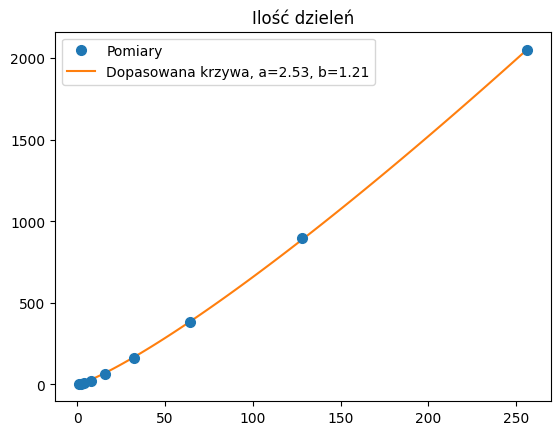

In [49]:
print_results(lu_results_strassen, "lu_Strassen")